# IMPORT LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, f_oneway


In [2]:
#Import Data From csv Files
gdp_data = pd.read_csv('all_data.csv')
print(gdp_data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [3]:
#Data type check
print(gdp_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


# Preparing the data for analysys

## CONVERT GDP INTO TRILLIONS

In order to make data for accessible, convert the gdp data into Trillions.

Note: Trillions abbr. is "T".


In [4]:
gdp_data['GDP_T'] = np.round(gdp_data.GDP/10**12,2)
print(gdp_data.head(5))

  Country  Year  Life expectancy at birth (years)           GDP  GDP_T
0   Chile  2000                              77.3  7.786093e+10   0.08
1   Chile  2001                              77.3  7.097992e+10   0.07
2   Chile  2002                              77.8  6.973681e+10   0.07
3   Chile  2003                              77.9  7.564346e+10   0.08
4   Chile  2004                              78.0  9.921039e+10   0.10


## SEPARATE THE DATA BY COUNTRY

We will be using the Country Abbreviations from "https://sustainablesources.com/"
As an example, here are some of them:

![country_abbr_example.png](attachment:country_abbr_example.png)

In [5]:
#Check all the countries
unique_countries = gdp_data.Country.unique()
print(unique_countries)
unique_country_labels = ['Chile' 'China' 'Germany' 'Mexico' 'U.S.A' 'Zimbabwe']
#Check the number of years covered by the dataset
unique_years = gdp_data.Year.unique()
print(unique_years)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [6]:
#GDP China
gdp_cn = gdp_data[gdp_data.Country == 'China']
#GDP Chile
gdp_cl = gdp_data[gdp_data.Country == 'Chile']
#GDP Germany
gdp_de = gdp_data[gdp_data.Country == 'Germany']
#GDP Mexico
gdp_mx = gdp_data[gdp_data.Country == 'Mexico']
#GDP USA
gdp_us = gdp_data[gdp_data.Country == 'United States of America']
#GDP Zimbabwe
gdp_zw = gdp_data[gdp_data.Country == 'Zimbabwe']

# Exploratory Data Analysis

The provided datset contains GDP and Life expectancy at birth measurements for 6 countries observed for a period of 15 years.

In [7]:
print(gdp_data.describe())
median_gdp = np.median(gdp_data.GDP_T)
q1,q3 = np.percentile(gdp_data.GDP, [25,75])
iqr_gdp = q3-q1
print('Median GDP:', np.round(median_gdp,2))
print('IQR GDP Trillions:', np.round(iqr_gdp/10**12,2))
median_leab = np.median(gdp_data['Life expectancy at birth (years)'])
q1,q3 = np.percentile(gdp_data['Life expectancy at birth (years)'], [25,75])
iqr_leab = q3-q1
print('Median LEAB:', np.round(median_leab,2))
print('IQR LEAB:', np.round(iqr_leab,2))

              Year  Life expectancy at birth (years)           GDP      GDP_T
count    96.000000                         96.000000  9.600000e+01  96.000000
mean   2007.500000                         72.789583  3.880499e+12   3.880625
std       4.633971                         10.672882  5.197561e+12   5.197317
min    2000.000000                         44.300000  4.415703e+09   0.000000
25%    2003.750000                         74.475000  1.733018e+11   0.170000
50%    2007.500000                         76.750000  1.280220e+12   1.280000
75%    2011.250000                         78.900000  4.067510e+12   4.067500
max    2015.000000                         81.000000  1.810000e+13  18.100000
Median GDP: 1.28
IQR GDP Trillions: 3.89
Median LEAB: 76.75
IQR LEAB: 4.43


Looking at the GDP data, the average and median GDP were 3.88T and 1.28T U.S. Dollars, respectively. The distribution is unimodal and heavily right skewed with the majority of the observations to the left of the center.

The IQR is 3.89T, with the lowest GDP close to 0.17T and the largest GDP over 4.06T. There is one GDP of over 18T U.S. Dollars, who is considered an outlier.

The Life Expectancy at birth (LEAB) data shares simmilar characteristics, being unimodal and a heavy skew, but this time to the left. The average and median LEAB were 72.78 and 76.75 respectively.

The IQR is 4.43 years, with the lowest life expectancy close to 74 and the highest close to 79. There is one LEAB observation of 81 years, who is considered an outlier.

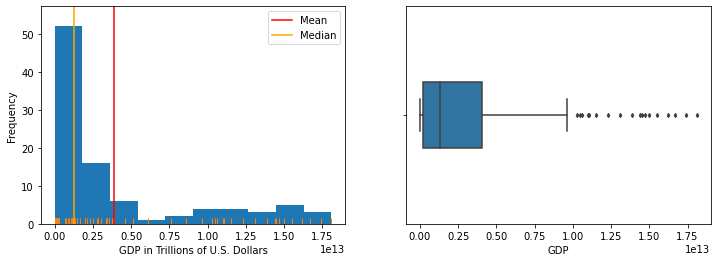

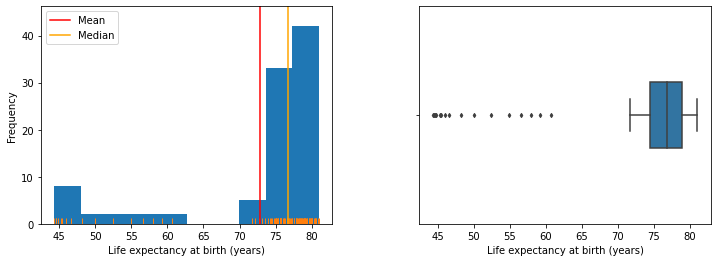

In [8]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(gdp_data.GDP)
sns.rugplot(data=gdp_data, x='GDP')
plt.xlabel('GDP in Trillions of U.S. Dollars')
plt.ylabel('Frequency')
plt.axvline(np.mean(gdp_data.GDP), color='r', label='Mean')
plt.axvline(np.median(gdp_data.GDP), color='orange', label='Median')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=gdp_data, x='GDP', width=0.3, fliersize=3)
plt.show()

plt.close()
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(gdp_data['Life expectancy at birth (years)'])
sns.rugplot(data=gdp_data, x='Life expectancy at birth (years)')
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('Frequency')
plt.axvline(np.mean(gdp_data['Life expectancy at birth (years)']), color='r', label='Mean')
plt.axvline(np.median(gdp_data['Life expectancy at birth (years)']), color='orange', label='Median')
plt.legend()

ax=plt.subplot(1,2,2)
sns.boxplot(data=gdp_data, x='Life expectancy at birth (years)', width=0.3, fliersize=3)

plt.subplots_adjust(wspace=0.3)
plt.show()

# Diving into the dataset
In order to better understand the dataset we need to start dividing it into its components.

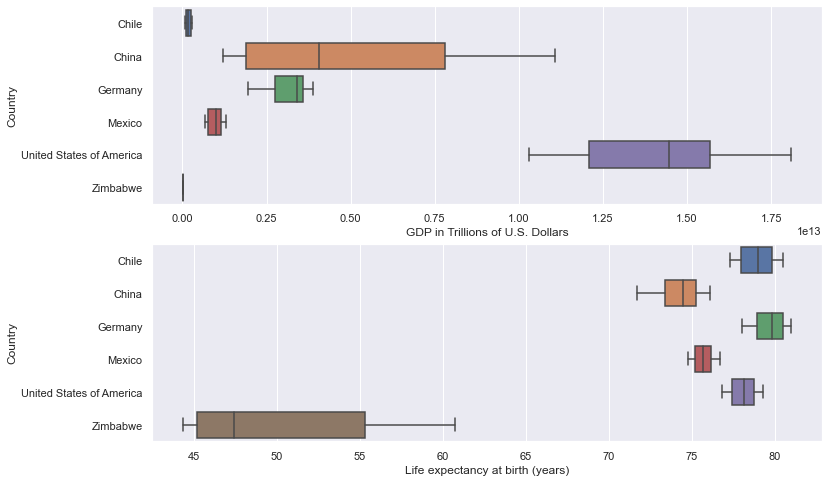

In [9]:
plt.close()
plt.figure(figsize=(12,8))
sns.set()
ax1 = plt.subplot(2,1,1)
sns.boxplot(data=gdp_data, y=gdp_data['Country'], x=gdp_data['GDP'])
ax1.set_xlabel('GDP in Trillions of U.S. Dollars')

ax2 = plt.subplot(2,1,2)
sns.boxplot(data=gdp_data, y=gdp_data['Country'], x=gdp_data['Life expectancy at birth (years)'])
plt.show()

# 1. Does the GDP correlate with the Life Expectancy at Birth?

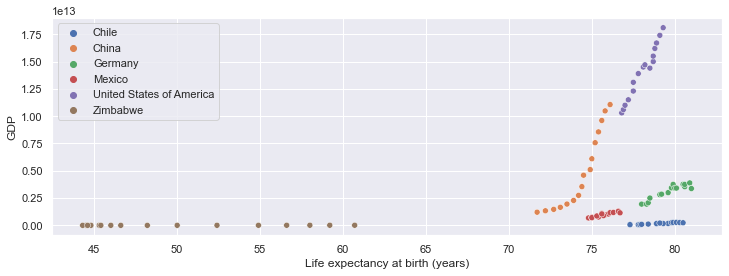

In [10]:
plt.close()
plt.figure(figsize=(12,4))

sns.scatterplot(x=gdp_data['Life expectancy at birth (years)'], y=gdp_data.GDP, hue=gdp_data.Country)
plt.legend()
plt.show()

In [11]:
corr_gdp_leab, p = pearsonr(gdp_data['GDP'], gdp_data['Life expectancy at birth (years)'])
print('Pearson correlation coefficient:', corr_gdp_leab)

Pearson correlation coefficient: 0.343206748449156


By calculating the Pearson correlation coefficient __[*](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)__ we can draw the conclusion that there is a positive linear correlation between GDP and Life Expectancy at Birth in our dataset.

This correlation can be roughly observed in the scatterplot above, but further analyzing each of the countries in the dataset might reveal different correlation coefficients.

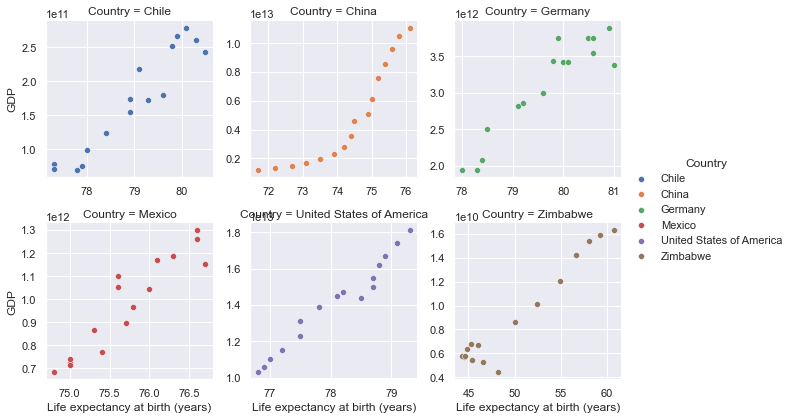

In [12]:
scatter_gdp_leaby = sns.FacetGrid(gdp_data, col_wrap=3, col='Country', hue='Country', sharex=False, sharey=False)
scatter_gdp_leaby = (scatter_gdp_leaby.map(sns.scatterplot, 'Life expectancy at birth (years)', 'GDP')).add_legend()

In [13]:
corr_gdp_leab_countries = []
for country in unique_countries:
    corr_gdp_leab, p = pearsonr(gdp_data['GDP'][gdp_data['Country'] == country], gdp_data['Life expectancy at birth (years)'][gdp_data['Country'] == country])
    corr_gdp_leab_countries.append(corr_gdp_leab)
    
df_corr_gdp_leab = pd.DataFrame(unique_countries,  columns=['country'])
df_corr_gdp_leab['pearson_corr'] = np.array(corr_gdp_leab_countries)
print(df_corr_gdp_leab)

                    country  pearson_corr
0                     Chile      0.949877
1                     China      0.908526
2                   Germany      0.932699
3                    Mexico      0.932238
4  United States of America      0.981709
5                  Zimbabwe      0.966200


We have plotted the relationship between the two variables for each of the countries in our dataset, and together with the Pearson correlation coefficient we can say that there is a strong positive correlation between the two.

# 2. Is there a significant increase in GDP and Life Expectancy at Birth in 2015 compared to 2000?

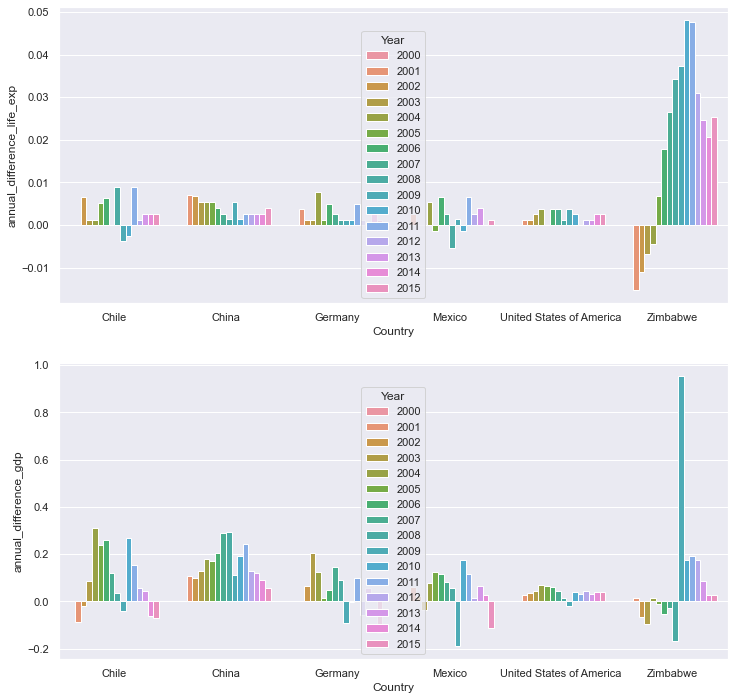

In [19]:
# calulate annual difference of life expectancy and gdp of China
# create cloumn T-1 of gdp and life expectancy 
gdp_data = gdp_data.rename(columns={'Life expectancy at birth (years)': 'life_exp'})
gdp_data['life_exp_t1'] = gdp_data['life_exp'].shift(1)
gdp_data['GDP_t1'] = gdp_data['GDP'].shift(1)

# set gdp data and life expectancy in the year 2000 to 0 in column T-1 
def change_2000_gdp(df):
    if df['Year'] == 2000:
        return 0
    else:
        return df['GDP_t1']

def change_2000_life(df):
    if df['Year'] == 2000:
        return 0
    else:
        return df['life_exp_t1']

gdp_data['GDP_t1'] = gdp_data.apply(change_2000_gdp, axis=1)
gdp_data['life_exp_t1'] = gdp_data.apply(change_2000_life, axis=1)

# calculate the annual difference of gdp and life expectancy

gdp_data['annual_difference_life_exp'] = (gdp_data['life_exp'] - gdp_data['life_exp_t1'])/ gdp_data['life_exp_t1'] 
gdp_data['annual_difference_gdp'] = (gdp_data['GDP'] - gdp_data['GDP_t1'])/ gdp_data['GDP_t1']

#
# plt.clf()
fig, axs = plt.subplots(2, figsize=(12,12))

#gdp_data_no_zimbabwe = gdp_data[gdp_data['Country'] != 'Zimbabwe']
sns.barplot(ax= axs[0], data= gdp_data, x= 'Country', y = 'annual_difference_life_exp', hue = 'Year')
sns.barplot(ax = axs[1], data= gdp_data, x= 'Country', y = 'annual_difference_gdp', hue = 'Year')
plt.show()


# 3: Is there a relationship between gdp of usa and mexico and chile given they are on the same continent?
By using ANOVA (Analysis of Variance) <br>
H0: There's no relationship between US GDP, Mexico and Chile <br>
H1: There's a relationship between US GDP, Mexico and Chile<br>

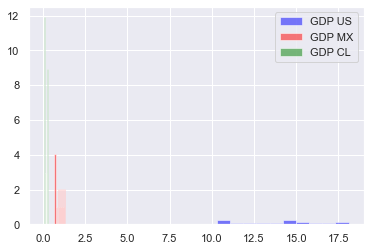

In [20]:
plt.hist(gdp_us.GDP_T , color="blue", label="GDP US",density=True, alpha=0.5)
plt.hist(gdp_mx.GDP_T , color="red", label="GDP MX",density=True, alpha=0.5)
plt.hist(gdp_cl.GDP_T , color="green", label="GDP CL",density=True, alpha=0.5)
plt.legend()
plt.show()

In [16]:
fstat, pval = f_oneway(gdp_us.GDP_T,gdp_mx.GDP_T,gdp_cl.GDP_T)
print('Significant Relationship. H1 is True' if pval < 0.05 else 'Not significant. H0 is True.')
print('''There's a relationship between US GDP, Mexico and Chile''' if pval < 0.05 else '''There's no relationship between US GDP, Mexico and Chile.''')

Significant Relationship. H1 is True
There's a relationship between US GDP, Mexico and Chile


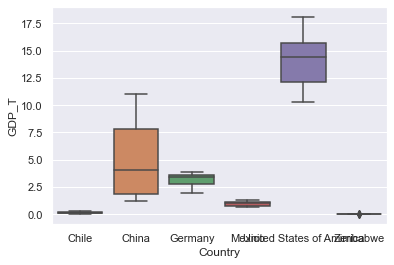

In [21]:
sns.boxplot(data = gdp_data, x='Country', y = 'GDP_T')
plt.show()